In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### LOADING IN THE DATA

In [2]:
batch_size = 32
img_height = 200
img_width = 200


In [3]:
data_dir= r"dataset\asl_alphabet_train\asl_alphabet_train"

#Splitting the dataset into training and validation dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [5]:
#Print class names
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


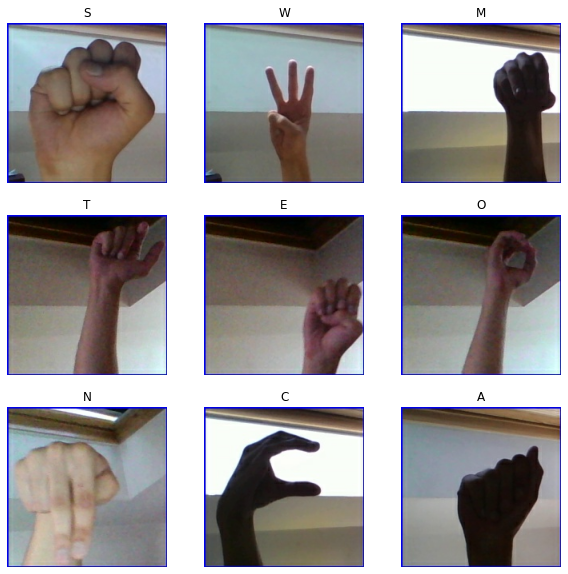

In [6]:
#Visualizing the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


### PREPROCESSING THE DATA

In [ ]:
#Defining some preprocessing layers

#Defining the normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

#Augmenting the data
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
